In [36]:
import numpy as np
import matplotlib.pyplot as plt
from discriminants_v2 import GaussianDiscriminant, MultivariateGaussian

In [37]:
total_samples = 1000

resting = 430
stressed = total_samples - resting

np.random.seed(90)
resting_heart_rates = np.random.normal(60, 5, resting)
stressed_heart_rates = np.random.normal(110, 5, stressed)

In [38]:
resting_discriminant = GaussianDiscriminant(resting_heart_rates, name="Resting")
stressed_discriminant = GaussianDiscriminant(stressed_heart_rates, name="Stressed")

x_values = np.linspace(40, 120, 1000)
resting_values = [resting_discriminant.calc_discriminant(x) for x in x_values]
stressed_values = [stressed_discriminant.calc_discriminant(x) for x in x_values]

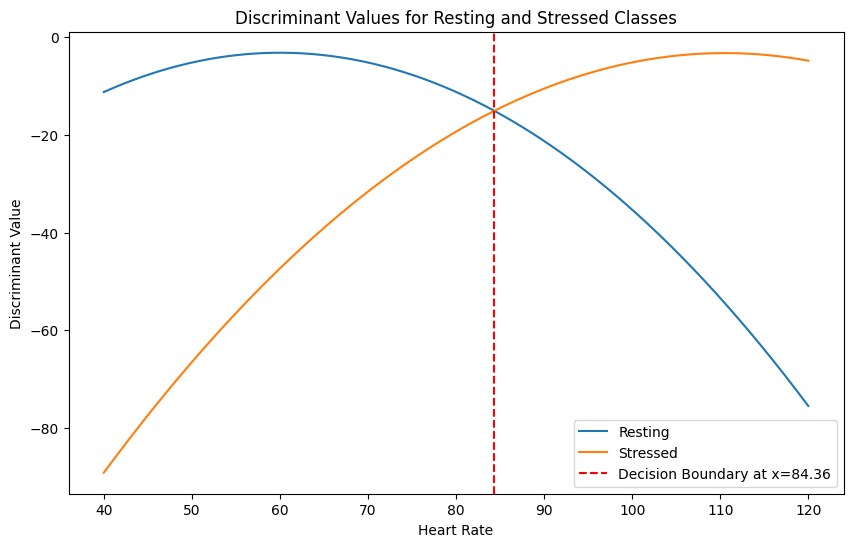

In [39]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, resting_values, label=resting_discriminant.name)
plt.plot(x_values, stressed_values, label=stressed_discriminant.name)

decision_boundary_x = x_values[np.argmin(np.abs(np.array(resting_values) - np.array(stressed_values)))]
plt.axvline(x=decision_boundary_x, color='r', linestyle='--', label=f'Decision Boundary at x={decision_boundary_x:.2f}')

plt.xlabel('Heart Rate')
plt.ylabel('Discriminant Value')
plt.title('Discriminant Values for Resting and Stressed Classes')
plt.legend()
plt.show()

The distributions and standard deviations are both equal which means the decision boundry lies between the means of both distributions. The parabolic shape is a consequence of the formula that calculates the probability that a given data point (x) belongs to a particular class (Ci). The formula is -((x-u)^2/2σ^2) and can be expressed in the form of a quadratic.

In [40]:
samples = 1000

mu_resting = [60, 10]
sigma_resting = [[20, 100], [100, 20]]

mu_stressed = [100, 80]
sigme_stressed = [[50, 20], [20, 50]]

np.random.seed(90)
resting_heart_rates = np.random.multivariate_normal(mu_resting, sigma_resting, samples)
stressed_heart_rates = np.random.multivariate_normal(mu_stressed, sigme_stressed, samples)

/var/folders/cl/c16hh87s1h53kvxy27ms7rjc0000gn/T/ipykernel_5329/2538226848.py:10: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  resting_heart_rates = np.random.multivariate_normal(mu_resting, sigma_resting, samples)


In [41]:
resting_discriminant = MultivariateGaussian(resting_heart_rates, name="Resting")
stressed_discriminant = MultivariateGaussian(stressed_heart_rates, name="Stressed")

x_range = np.linspace(20, 120, 100)
y_range = np.linspace(20, 120, 100)
X, Y = np.meshgrid(x_range, y_range)
grid_points = np.stack([X, Y], axis=-1).reshape(-1, 2)

Z_resting = np.array([resting_discriminant.calc_discriminant(point) for point in grid_points]).reshape(X.shape)
Z_stressed = np.array([stressed_discriminant.calc_discriminant(point) for point in grid_points]).reshape(X.shape)

Z_difference = (Z_resting - Z_stressed).reshape(X.shape)

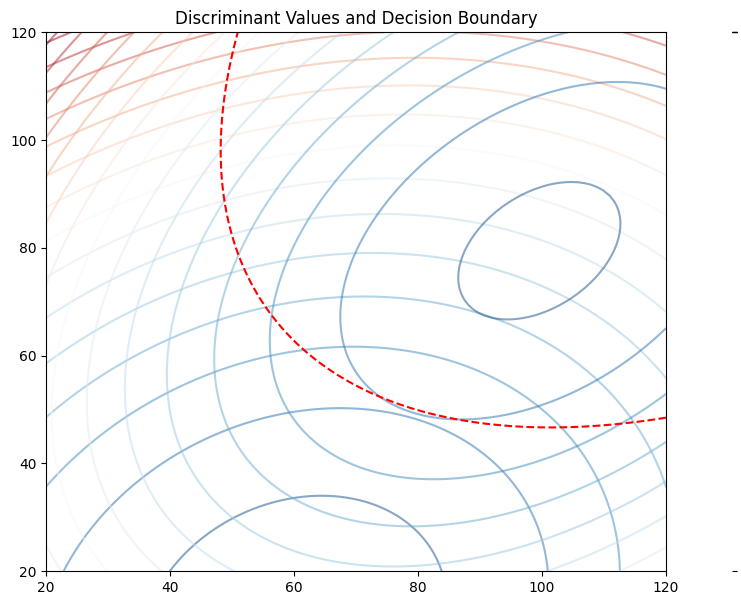

In [42]:
try:
    plt.figure(figsize=(10, 7))
    plt.contour(X, Y, Z_resting, levels=15, cmap='RdBu', alpha=0.5)
    plt.contour(X, Y, Z_stressed, levels=15, cmap='RdBu', alpha=0.5)
    plt.contour(X, Y, Z_difference, levels=[0], colors='r', linestyles='--')
    
    plt.title('Discriminant Values and Decision Boundary')
    plt.colorbar()
    plt.show()
except IndexError:
    pass